In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYZLPM7/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYZLPM7/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteYZLPM7/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [5]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
model_run_stats = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 72s 103ms/step - loss: 0.4416 - accuracy: 0.7838 - val_loss: 0.3145 - val_accuracy: 0.8726
Epoch 2/10
391/391 [==============================] - 21s 52ms/step - loss: 0.2204 - accuracy: 0.9155 - val_loss: 0.3004 - val_accuracy: 0.8756
Epoch 3/10
391/391 [==============================] - 18s 44ms/step - loss: 0.1695 - accuracy: 0.9370 - val_loss: 0.3179 - val_accuracy: 0.8755
Epoch 4/10
391/391 [==============================] - 18s 43ms/step - loss: 0.1375 - accuracy: 0.9492 - val_loss: 0.3497 - val_accuracy: 0.8676
Epoch 5/10
391/391 [==============================] - 17s 40ms/step - loss: 0.1131 - accuracy: 0.9612 - val_loss: 0.4593 - val_accuracy: 0.8554
Epoch 6/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0886 - accuracy: 0.9692 - val_loss: 0.4406 - val_accuracy: 0.8625
Epoch 7/10
391/391 [==============================] - 16s 39ms/step - loss: 0.0674 - accuracy: 0.9782 - val_loss: 0.5557 - val_accuracy

In [13]:
import matplotlib.pyplot as plt

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

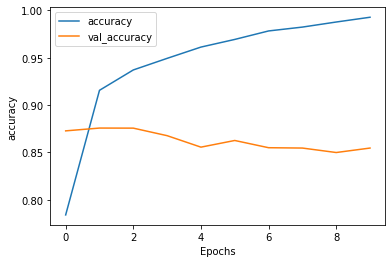

In [17]:
plot_graphs(model_run_stats, 'accuracy')

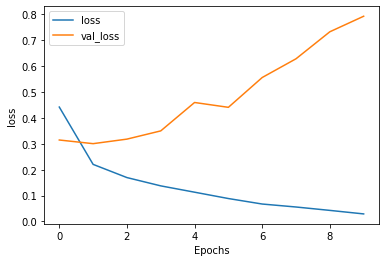

In [18]:
plot_graphs(model_run_stats, 'loss')